## 기상청 기상자료개방포털/다중지점통계/기온, 강수량
- url: https://data.kma.go.kr/climate/StatisticsDivision/selectStatisticsDivision.do?pgmNo=158https://data.kma.go.kr/climate/StatisticsDivision/selectStatisticsDivision.do?pgmNo=158
- Last update: 22/11/09
- Author: Jeung-Hyun Lee (jhleeangel@snu.ac.kr)

In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [127]:
PATH_ROOT = '/home/jhlee4991/SNU/2022-2-data-visualization/2022-DAV_project'
PATH_DATA = f'{PATH_ROOT}/data'
PATH_ANALYSIS = f'{PATH_ROOT}/JH'
data_raw = os.listdir(PATH_DATA)

# get files including 'temp_rain*' in the names
data_files = sorted([file for file in data_raw if 
                     file.endswith(".csv") and 
                     file.startswith("temp_rain")])

# define path to save
PATH_SAVE = f'{PATH_ANALYSIS}'

# names of the districts (N = 16)
district_ls = ['seoul', 'busan', 'daegu', 'daejeon', 'gangwon', 'gyeonggi', 'jeju',
              'choongbook', 'choongnam', 'gwangju', 'gyeongbook', 'gyeongnam', 
               'incheon', 'jeonbook', 'jeonnam', 'ulsan']
column_names = ['year', 'mean_temp', 'high_temp', 'low_temp', 'rain', 'district']
                # _temp: dc, rain: mm

In [128]:
# run all subjects in the path
df_temp_rain = pd.DataFrame(columns = column_names)

for file in data_files:
    file_ = pd.read_csv(f'{PATH_DATA}/{file}', 
                        names=column_names, header=None)[:-1] # drop the very last row
    file_['district'] = file.split('_')[2].split('.')[0]      # specify the district
    file_['year'] = file_.year.str[:-2]                       # process the year column
    df_temp_rain = pd.concat([df_temp_rain,file_], axis  = 0)

In [151]:
df_temp_rain

,year,mean_temp,high_temp,low_temp,rain,district
0,1904,NaN,NaN,NaN,1189.3,busan
1,1905,13.9,17.9,11.0,2047.1,busan
2,1906,13.0,16.8,9.5,1361.5,busan
3,1907,13.5,17.6,9.8,1021.2,busan
4,1908,13.3,17.2,9.7,1416.0,busan
...,...,...,...,...,...,...
78,2018,14.3,19.0,10.2,1416.1,ulsan
79,2019,14.9,19.7,10.7,1450.1,ulsan
80,2020,14.6,19.3,10.6,1557.9,ulsan
81,2021,14.9,19.6,10.8,1337.0,ulsan


In [153]:
df_yr_rain = df_temp_rain.pivot('district', 'year', 'rain')

In [155]:
df_yr_rain

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
district,,,,,,,,,,,,,,,,,,,,,
busan,1189.3,2047.1,1361.5,1021.2,1416.0,1210.9,1542.8,1919.5,1323.7,954.5,...,1130.1,1693.1,1396.7,1760.2,1014.4,1778.6,1623.2,2281.6,1807.8,909.2
choongbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5826.9,4952.5,3938.1,5401.7,5689.4,6853.7,4705.5,7679.7,5756.1,5786.6
choongnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5735.1,5303.4,4278.0,5935.0,6080.7,7881.9,5479.4,9226.8,7030.4,7216.9
daegu,NaN,NaN,NaN,511.6,854.1,880.3,1301.7,1455.4,625.8,675.2,...,996.4,1072.1,908.5,1227.3,663.7,1297.6,995.7,1244.9,910.0,542.8
daejeon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1120.2,1117.7,822.7,1228.4,1127.5,1542.1,984.2,1614.0,1109.5,1142.6
gangwon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.4,1371.9,950.1,...,15994.4,13078.5,11621.3,14912.0,15425.0,20299.5,15324.2,22051.7,15819.0,19629.8
gwangju,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1245.4,1290.3,1049.6,1482.3,936.6,1427.9,1085.9,2027.0,1303.8,692.6
gyeongbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13882.2,16153.6,11522.7,17083.0,12098.1,18432.5,16069.7,19103.3,16686.0,11226.7
gyeonggi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7108.1,3995.0,4099.8,5080.6,5474.5,6583.5,5002.4,7924.9,5253.4,8810.3


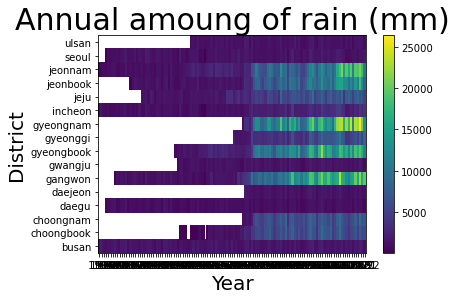

In [145]:
plt.pcolor(df_tr_pivot)
plt.xticks(np.arange(0.5, len(df_tr_pivot.columns), 1), df_tr_pivot.columns)
plt.yticks(np.arange(0.5, len(df_tr_pivot.index), 1), df_tr_pivot.index)
plt.title('Annual amoung of rain (mm)', fontsize = 30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('District', fontsize=20)
plt.colorbar()

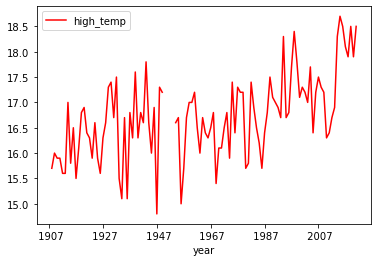

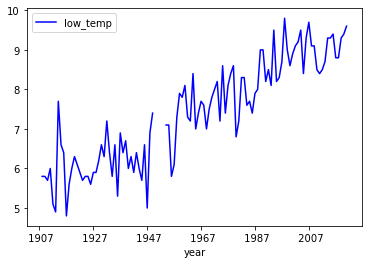

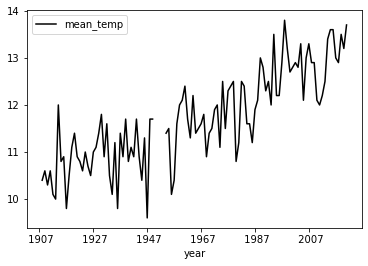

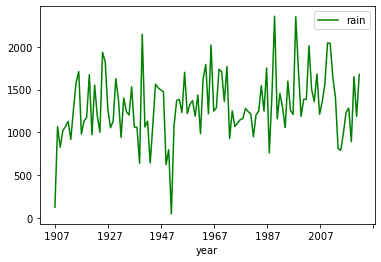

In [163]:
# fig, ax1 = plt.subplots(figsize = (20, 5))
# ax2 = ax1.twinx()
tmp = df_temp_rain[df_temp_rain['district']=='seoul']
tmp.plot(kind='line',x='year',y='high_temp',color='red')
tmp.plot(kind='line',x='year',y='low_temp',color='blue')
tmp.plot(kind='line',x='year',y='mean_temp',color='black')
tmp.plot(kind='line',x='year',y='rain',color='green')
plt.show()
# busan = ax1.plot(df_tr_pivot[''])